<a href="https://colab.research.google.com/github/nnilayy/Classification-Notebook/blob/main/Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [234]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [235]:
df=pd.read_csv('/content/winequality-red.csv')

In [236]:
df.drop(['citric acid','chlorides'],axis=1)

,fixed acidity,volatile acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,1.9,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,2.6,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,2.3,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,1.9,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,1.9,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,2.0,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,2.2,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,2.3,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,2.0,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [237]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [238]:
X=df.drop('quality',axis=1)
y=df['quality']


In [239]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
# X, y = load_digits(return_X_y=True, n_class=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [240]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [242]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# mae = mean_absolute_error(y_test, y_test_pred)
# mse = mean_squ ared_error(y_test, y_test_pred)
# rmse = np.sqrt(mse)


In [243]:
# df.columns 
# df.columns.values
# df.columns.values.tolist()
# pd.DataFrame(df.columns)

In [244]:
# Converting Numeric Column with repeating value to string to get a scatter plot
# plt.scatter(df['Year'].astype(str),y)
# print(sns.scatterplot(x=df['State_Name'],y=y))
# plt.figure(figsize=(15,10),dpi=300)
# plt.xticks(rotation=90)
# plt.line(x=df['sulphates'],y=df['quality'])
# plt.scatter(x=df['chlorides'],y=df['quality'])
# sns.lineplot(x=df['sulphates'],y=df['quality'])
# plt.show()

In [245]:
# df['quality'].unique() 
# df.corr()

# # Returns the columns with just numeric columns
# df.select_dtypes(include=['number'])
# g=sns.PairGrid(df)
# g.map(plt.scatter)
# # Balanced Dataset or not

In [246]:
# TO REMOVE WARNINGS USE THIS
import warnings
warnings.filterwarnings("ignore")

# OR USE THIS
# import warnings
# def fxn():
#     warnings.warn("deprecated", DeprecationWarning)

# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     fxn()

In [247]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier 

models=[
    ExtraTreesClassifier, RandomForestClassifier, HistGradientBoostingClassifier, 
    BaggingClassifier, GradientBoostingClassifier, XGBClassifier,
    GaussianProcessClassifier,DecisionTreeClassifier, SVC, 
    MLPClassifier, LinearSVC, KNeighborsClassifier, 
    RidgeClassifier, LogisticRegression, LinearDiscriminantAnalysis, 
    AdaBoostClassifier, QuadraticDiscriminantAnalysis, GaussianNB]

accuracy = []
for model in models:
  m=model()
  m.fit(X_train,y_train) 
  y_test_pred = m.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_test_pred)*100)

In [248]:
# Extracting the model name from the models
model_names=[]
for model in models:
  model_names.append(model.__name__)

# Combining the Model Name and Accuracy in a dataframe
# Here Model_Names and Accuracy Both are lists
# acc=pd.DataFrame(list(zip(model_names,accuracy)),columns=['Name','Accuracy'])
acc=pd.DataFrame({'Name':model_names, 'Accuracy':accuracy})

# Arranging the dataframe by the models with the highest accuracy to lowest accuracy
acc=acc.sort_values(by='Accuracy',ascending=False).reset_index(drop=True)
acc.index = acc.index + 1
acc

,Name,Accuracy
1,RandomForestClassifier,66.041667
2,ExtraTreesClassifier,65.208333
3,HistGradientBoostingClassifier,64.166667
4,BaggingClassifier,62.291667
5,GradientBoostingClassifier,62.083333
6,XGBClassifier,61.250000
7,GaussianProcessClassifier,60.000000
8,SVC,59.166667
9,DecisionTreeClassifier,58.333333
10,KNeighborsClassifier,57.916667


<Figure size 2880x2880 with 0 Axes>

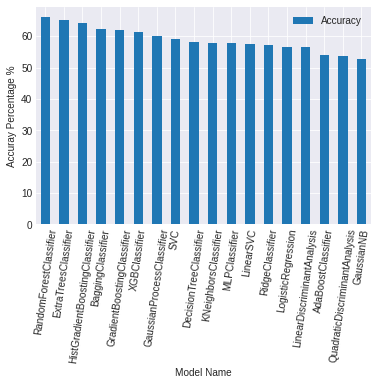

In [249]:
# Plotting the Accuracy of Different Models
fig=plt.figure(figsize=(20,30))
fig.set_size_inches(40,40)
acc.plot(kind ='bar',x="Name",y='Accuracy')
plt.xlabel('Model Name')
plt.ylabel('Accuray Percentage %')
plt.xticks(rotation=82);
plt.show()

In [250]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [251]:
#Taking anything as a parameter
x=type(df.isnull().mean()*100)
def d(x):
  d=pd.DataFrame(x)
  return d 
d(df.isnull().mean()*100)

,0
fixed acidity,0.0
volatile acidity,0.0
citric acid,0.0
residual sugar,0.0
chlorides,0.0
free sulfur dioxide,0.0
total sulfur dioxide,0.0
density,0.0
pH,0.0
sulphates,0.0


In [252]:
df.shape

(1599, 12)

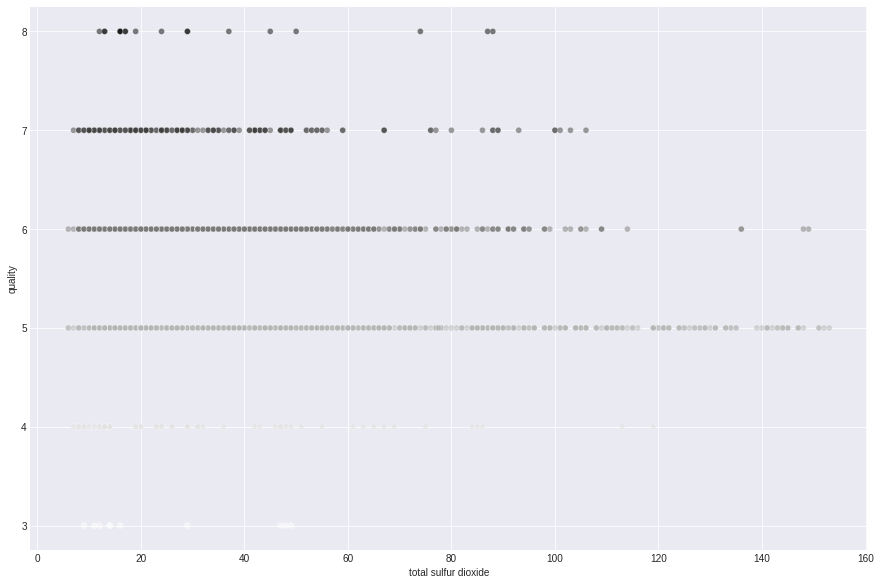

In [253]:
# df.info()
# df['quality'].plot(kind='kde')
fig = plt.gcf()
fig.set_size_inches(15, 10)
df=df[df['total sulfur dioxide']<155]
sns.scatterplot(x=df['total sulfur dioxide'],y=df['quality'],c=df['quality'],alpha=0.5)
plt.legend()

In [254]:
# How to Drop Multiple rows
# Find the rows, 
# Save them, 
# Drop them using their index
dr=df[(df['total sulfur dioxide']>100) & (df['quality']==4)]
df=df.drop(dr.index,axis=0)

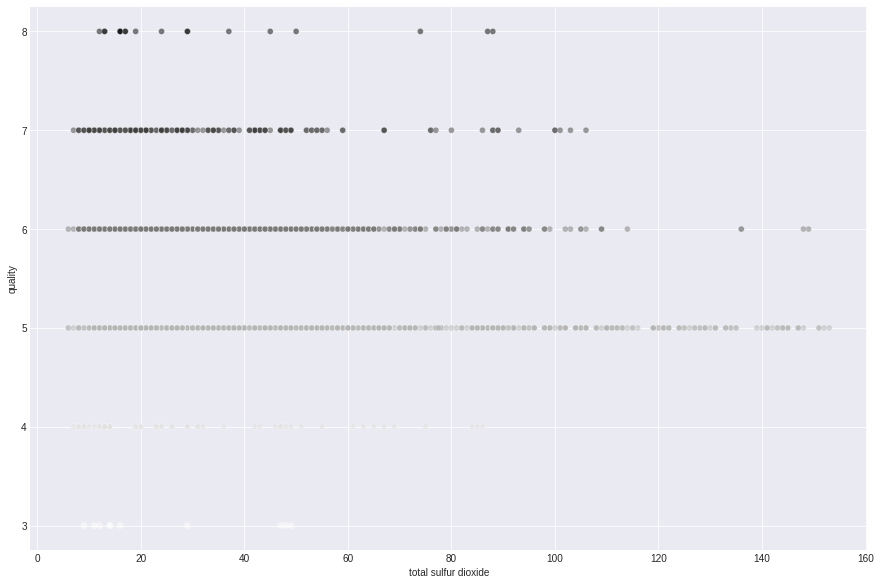

In [255]:
fig = plt.gcf()
fig.set_size_inches(15, 10)
sns.scatterplot(x=df['total sulfur dioxide'],y=df['quality'],c=df['quality'],alpha=0.5)
plt.legend()

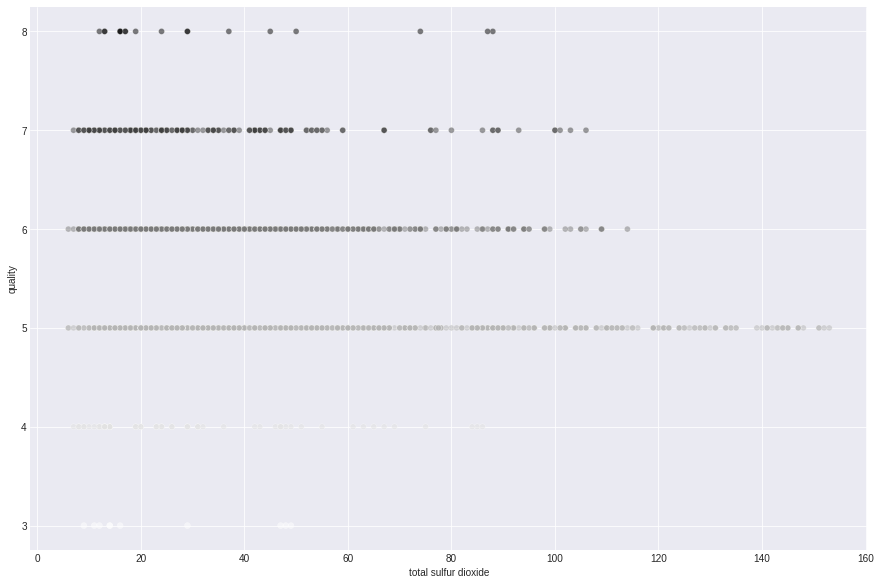

In [256]:
dr=df[(df['total sulfur dioxide']>120) & (df['quality']==6)]
df=df.drop(dr.index,axis=0)
fig = plt.gcf()
fig.set_size_inches(15, 10)
sns.scatterplot(x=df['total sulfur dioxide'],y=df['quality'],c=df['quality'],alpha=0.5)
plt.legend()

In [257]:
d(df.isnull().mean()*100)

,0
fixed acidity,0.0
volatile acidity,0.0
citric acid,0.0
residual sugar,0.0
chlorides,0.0
free sulfur dioxide,0.0
total sulfur dioxide,0.0
density,0.0
pH,0.0
sulphates,0.0


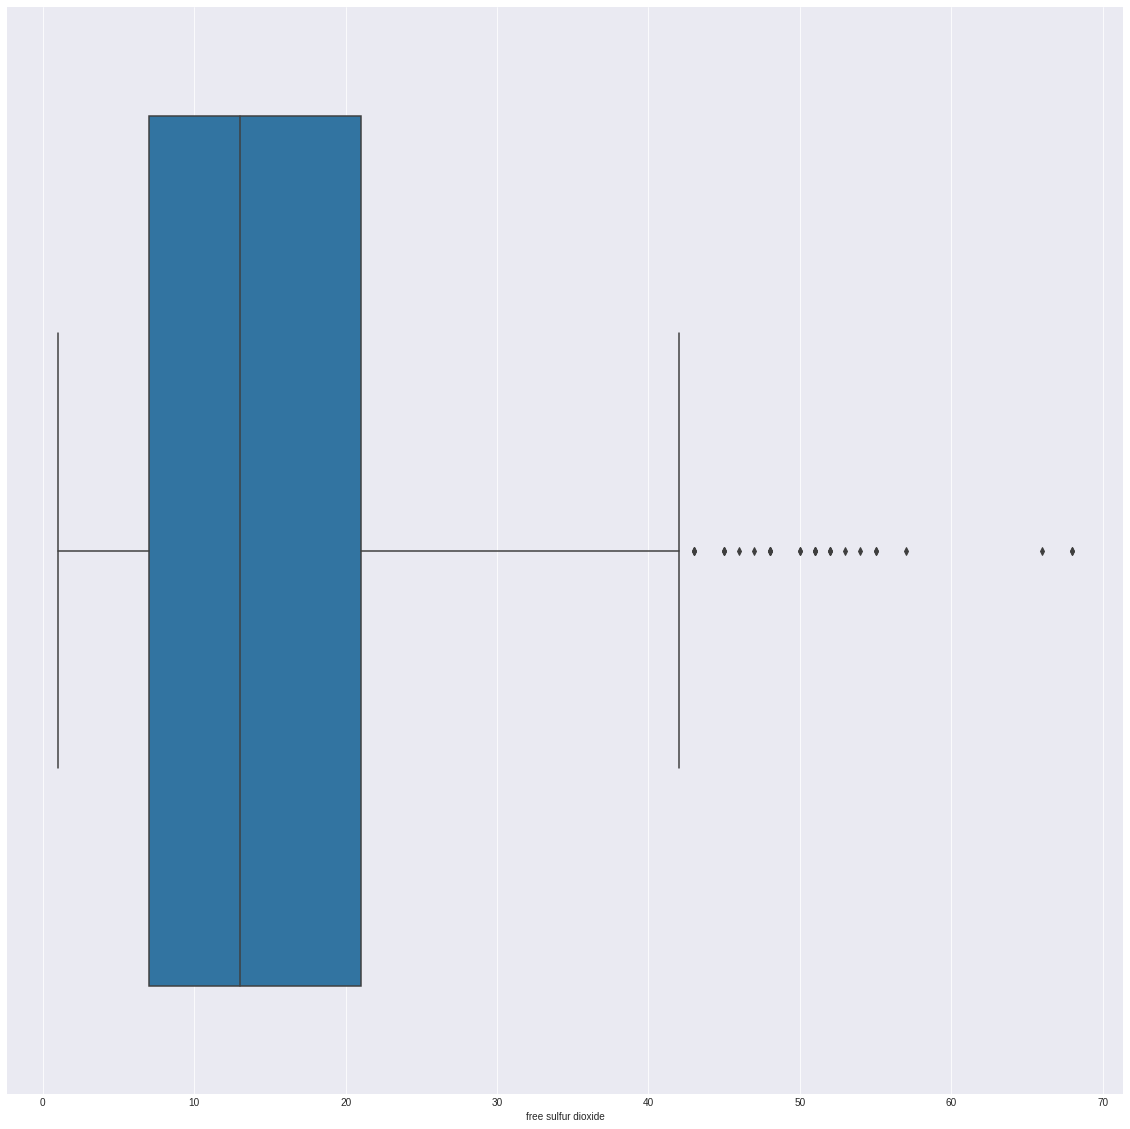

In [258]:
column=df['free sulfur dioxide']
p75=column.quantile(0.75)
p25=column.quantile(0.25)
iqr=p75-p25
ul=p75+2*iqr
ll=p25-2*iqr
df=df[(column<ul) & (column>ll)]
fig=plt.figure(figsize=(20,30))
fig.set_size_inches(20,20)
sns.boxplot(column)


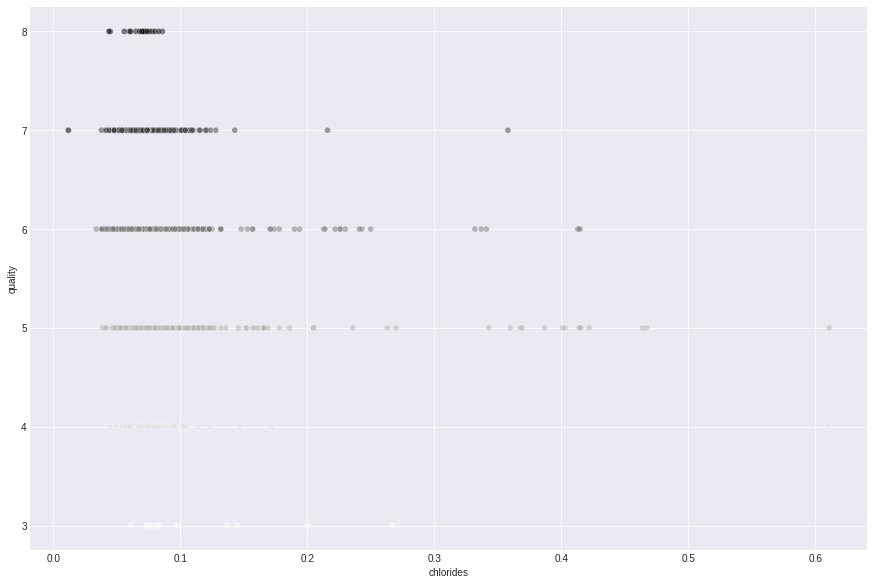

In [259]:
fig = plt.gcf()
fig.set_size_inches(15, 10)
sns.scatterplot(x=df['chlorides'],y=df['quality'],c=df['quality'],alpha=0.5)
plt.legend()

In [260]:
dr1=df[(df['chlorides']>0.2) & (df['quality']==7)]
dr2=df[(df['chlorides']>0.3) & (df['quality']==6)]
dr3=df[(df['chlorides']>0.30) & (df['quality']==5)]
dr4=df[(df['chlorides']>0.2) & (df['quality']==4)]
dr5=df[(df['chlorides']>0.2) & (df['quality']==3)]
dx=[dr1,dr2,dr3,dr4,dr5]
for rows in dx:
  df.drop(rows.index,axis=0,inplace=True)

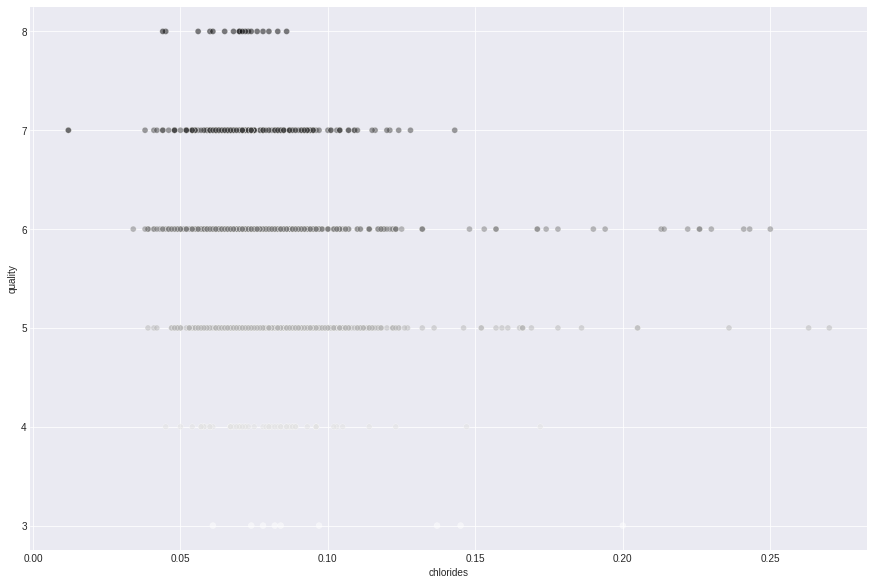

In [261]:
fig = plt.gcf()
fig.set_size_inches(15, 10)
sns.scatterplot(x=df['chlorides'],y=df['quality'],c=df['quality'],alpha=0.5)
plt.legend()

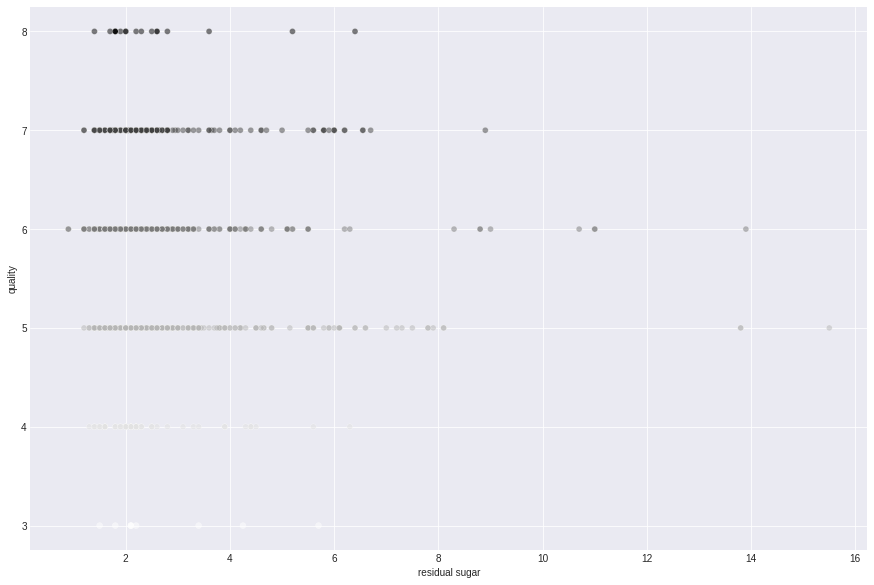

In [262]:
fig = plt.gcf()
fig.set_size_inches(15, 10)
sns.scatterplot(x=df['residual sugar'],y=df['quality'],c=df['quality'],alpha=0.5)
plt.legend()

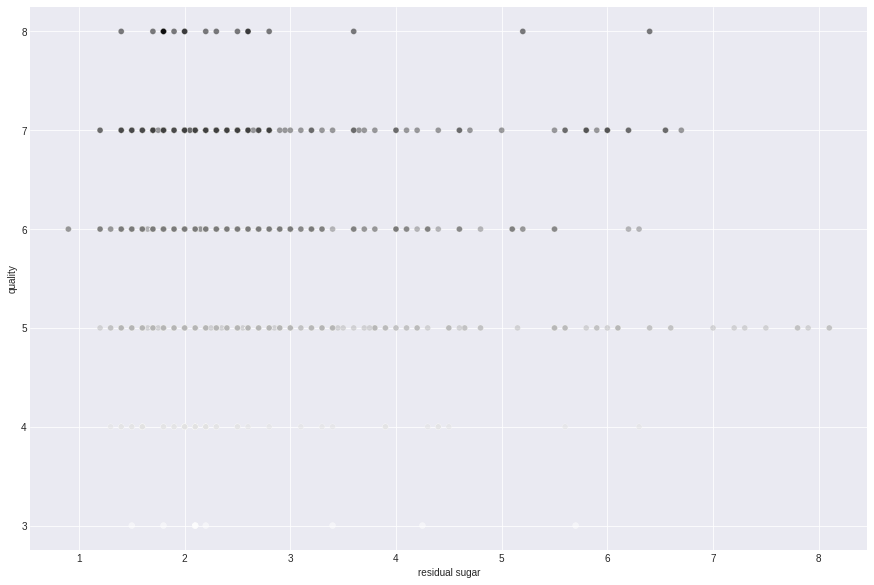

In [263]:
df=df[df['residual sugar']<10]
dr1=df[(df['residual sugar']>8) & (df['quality']==6)]
dr2=df[(df['residual sugar']>7) & (df['quality']==7)]

df=df.drop(dr1.index,axis=0)
df=df.drop(dr2.index,axis=0)

fig = plt.gcf()
fig.set_size_inches(15, 10)
sns.scatterplot(x=df['residual sugar'],y=df['quality'],c=df['quality'],alpha=0.5)
plt.legend()

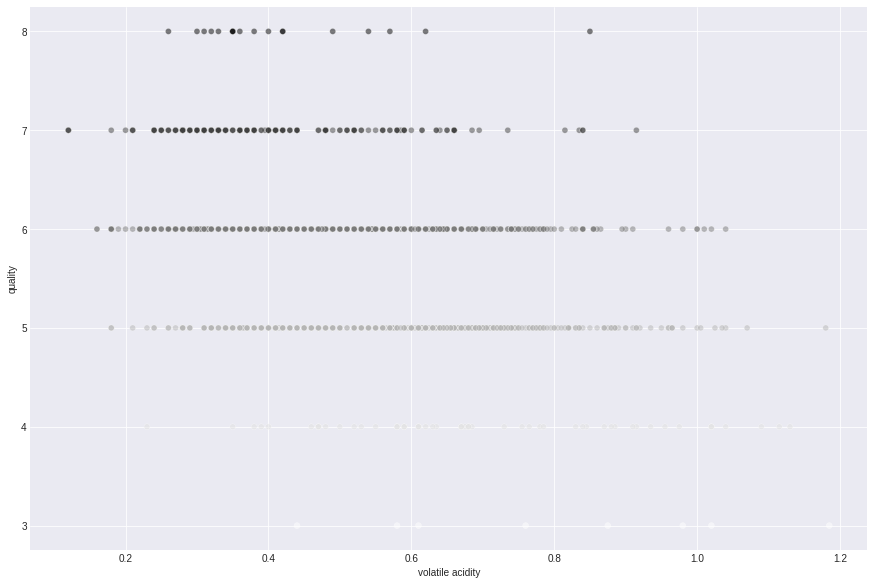

In [264]:
df=df[df['volatile acidity']<1.2]
# dr1=df[(df['residual sugar']>8) & (df['quality']==6)]
# dr2=df[(df['residual sugar']>7) & (df['quality']==7)]

# df=df.drop(dr1.index,axis=0)
# df=df.drop(dr2.index,axis=0)
fig = plt.gcf()
fig.set_size_inches(15, 10)
sns.scatterplot(x=df['volatile acidity'],y=df['quality'],c=df['quality'],alpha=0.5)
plt.legend()

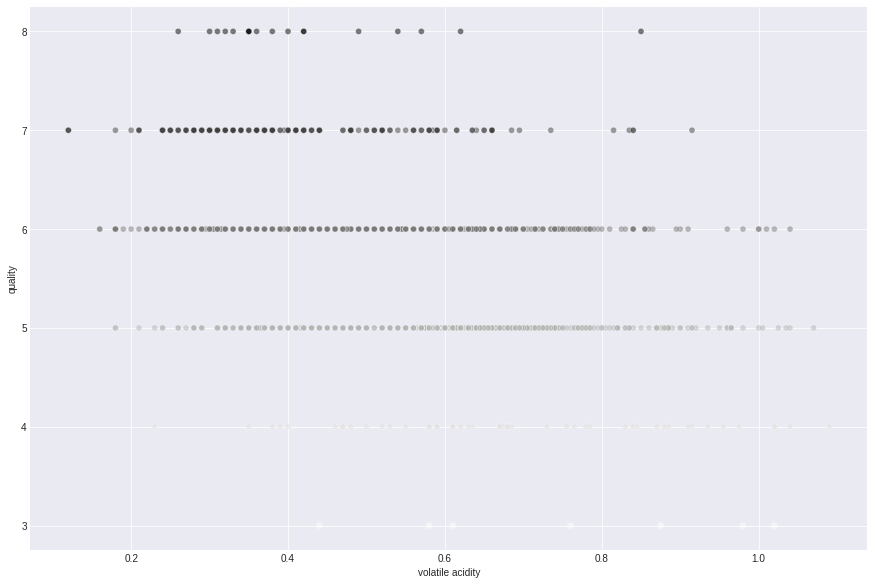

In [265]:
dr=df[(df['volatile acidity']>1.09) & (df['volatile acidity']<1.2)]
df=df.drop(dr.index,axis=0)
fig = plt.gcf()
fig.set_size_inches(15, 10)
sns.scatterplot(x=df['volatile acidity'],y=df['quality'],c=df['quality'],alpha=0.5)
plt.legend()

In [ ]:
df=df[df['fixed acidity']<14]
fig = plt.gcf()
fig.set_size_inches(15, 10)
sns.scatterplot(x=df['fixed acidity'],y=df['quality'],c=df['quality'],alpha=0.5)
plt.legend()


In [267]:
def outliers(str):
 p75=df['residual sugar'].quantile(0.75)
 p25=df['residual sugar'].quantile(0.25)
 iqr=p75-p25
 ul=p75+1.5*iqr
 ll=p25-1.5*iqr
 df=df[(df['residual sugar']<ul) & (df['residual sugar']>ll)]

In [ ]:
fig=plt.figure(figsize=(20,30))
fig.set_size_inches(20,20)
columns=df.columns
sns.boxplot(df['residual sugar'])

In [269]:
X=df.drop('quality',axis=1)
y=df['quality']


In [270]:
# OverSampling To create artificially more samples of a class in a column
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
os=SMOTE(k_neighbors=1)
# os=BorderlineSMOTE(k_neighbors=1)
X_res,y_res=os.fit_resample(X,y)

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=101)

In [272]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier 
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import SGDClassifier

# GaussianProcessClassifier takes the longest time

models=[
    ExtraTreesClassifier, RandomForestClassifier, HistGradientBoostingClassifier, 
    BaggingClassifier, GradientBoostingClassifier, XGBClassifier
    ,DecisionTreeClassifier, SVC, 
    MLPClassifier, LinearSVC, KNeighborsClassifier, 
    RidgeClassifier, LogisticRegression, LinearDiscriminantAnalysis, 
    AdaBoostClassifier, QuadraticDiscriminantAnalysis, GaussianNB,
    SGDClassifier]

accuracy = []
for model in models:
  m=model()
  m.fit(X_train,y_train) 
  y_test_pred = m.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_test_pred)*100)
  print('------------------------------------------------------------------------------------------------------------')
  print('------------------------------------------------------------------------------------------------------------') 
  print(model.__name__)
  print(classification_report(y_test, y_test_pred)) 
# Extracting the model name from the models
model_names=[]
for model in models:
  model_names.append(model.__name__)

# Combining the Model Name and Accuracy in a dataframe
# Here Model_Names and Accuracy Both are lists
# acc=pd.DataFrame(list(zip(model_names,accuracy)),columns=['Name','Accuracy'])
acc=pd.DataFrame({'Name':model_names, 'Accuracy':accuracy})

# Arranging the dataframe by the models with the highest accuracy to lowest accuracy
acc=acc.sort_values(by='Accuracy',ascending=False).reset_index(drop=True)
acc.index = acc.index + 1
acc

In [ ]:
# Plotting the Accuracy of Different Models
fig=plt.figure(figsize=(20,30))
fig.set_size_inches(40,40)
acc.plot(kind ='bar',x="Name",y='Accuracy')
plt.xlabel('Model Name')
plt.ylabel('Accuray Percentage %')
plt.xticks(rotation=82);
plt.show()

In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
pd.DataFrame(get_top_abs_correlations(df, 10))

In [ ]:
# fig=plt.figure(figsize=(20,30))
# fig.set_size_inches(8,8)
plt.style.use('seaborn-darkgrid')
_, axes = plt.subplots(4, 3, figsize=(25,25))
for (((x,y),value), column) in zip(np.ndenumerate(axes),columns):
  sns.boxplot(x=df['quality'], y=df[column], ax=axes[x][y])

# for axis in axes:
#   sns.boxplot(x=df['quality'], y=df['chlorides'], ax=axes[0][0])
